<a href="https://colab.research.google.com/github/danielkorat/dynamic_ds/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from tqdm import tqdm
from collections import defaultdict
from numpy import log

from nlp.data import get_ngram_counts, plot_token_frequencies
from nlp.model import train_simple_model
from count_min_param import CountMinEvaluation




In [2]:
DS_ITEM_COUNTS_PATH= './nlp/2_gram_counts_wikicorpus_0.1%.npz'
DS_NAME='conll2003'

In [ ]:
### get ngrams for wiki. we only used 10% of the data as dataset is huge. only run if necessary... ###

#get_ngram_counts('wikicorpus', limit_prop=0.1, n=2, tokens_key='sentence', name='tagged_en')

# actual tokens frequency

Num of unique tokens: 296149


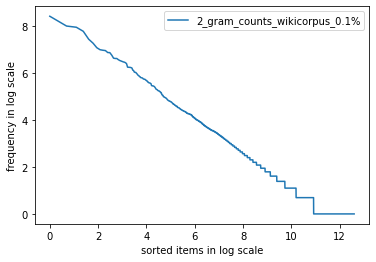

In [3]:
plot_token_frequencies(DS_ITEM_COUNTS_PATH)

# evaluating original count-min and count-sketch algorithms on data

In [4]:
### count sketch ###

DATA = DS_ITEM_COUNTS_PATH
SAVE='cmin_connel' #save_results to path
SEED= 69
N_HASHES=[1,2,3,4] 
SPACE_LIST=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,3,4] #in MB
N_WORKERS=30 #n_processes used 
DATA_NAME='conll' # determines which script for loading counts is used
COUNT_SKETCH=True

cme= CountMinEvaluation(space_list=SPACE_LIST, n_hashes_list=N_HASHES,
                        save=SAVE, 
                        n_workers= N_WORKERS,
                        data_name=DATA_NAME,
                        data=DATA,
                        count_sketch=COUNT_SKETCH,
                        seed=SEED)
cme.run()

/home/iddo/PycharmProjects/learning-ds/venv/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/iddo/.local/share/jupyter/runtime/kernel-0af98767-9c63-4bd6-a392-2dfec7617b80.json
commit b6329e3db0293537b80eec3193234cd2c2ea9d3a
Merge: 88bc380 7b02e8a
Author: iddo Yadlin <iddo.yadlin@chorus.ai>
Date:   Wed Mar 10 19:14:22 2021 +0200

    Merge remote-tracking branch 'origin/main' into main


statistics for ./nlp/2_gram_counts_wikicorpus_0.1%.npz
data #: 296149, shape (296149,)
positive ratio: 1.86854, max 4525.000000, min 1.000000


count_sketch: # hashes 1, # buckets 300000 - loss 1.33	 time: 131.95 sec
count_sketch: # hashes 1, # buckets 100000 - loss 3.32	 time: 132.13 sec
count_sketch: # hashes 1, # buckets 175000 - loss 2.13	 time: 133.03 sec
count_sketch: # hashes 1, # buckets 450000 - loss 0.98	 time: 133.10 sec
count_sketch: # hashes 1, # buckets 225000 - loss 1.72	 time: 133.54 sec
count_sketch: # hashes 1, # buckets 200000 - loss 1.93	 time: 133.72 sec
count_sketch: # ha

In [5]:
### count min ###

COUNT_SKETCH=False

cme= CountMinEvaluation(space_list=SPACE_LIST, n_hashes_list=N_HASHES,
                        save=SAVE, 
                        n_workers= N_WORKERS,
                        data_name=DATA_NAME,
                        data=DATA,
                        count_sketch=COUNT_SKETCH,
                        seed=SEED)
cme.run()


/home/iddo/PycharmProjects/learning-ds/venv/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/iddo/.local/share/jupyter/runtime/kernel-0af98767-9c63-4bd6-a392-2dfec7617b80.json
commit b6329e3db0293537b80eec3193234cd2c2ea9d3a
Merge: 88bc380 7b02e8a
Author: iddo Yadlin <iddo.yadlin@chorus.ai>
Date:   Wed Mar 10 19:14:22 2021 +0200

    Merge remote-tracking branch 'origin/main' into main


statistics for ./nlp/2_gram_counts_wikicorpus_0.1%.npz
data #: 296149, shape (296149,)
positive ratio: 1.86854, max 4525.000000, min 1.000000


count_min: # hashes 1, # buckets 100000 - loss 5.31	 time: 35.51 sec
count_min: # hashes 1, # buckets 200000 - loss 2.59	 time: 36.35 sec
count_min: # hashes 1, # buckets 125000 - loss 4.23	 time: 36.47 sec
count_min: # hashes 1, # buckets 1000000 - loss 0.51	 time: 36.76 sec
count_min: # hashes 1, # buckets 500000 - loss 1.04	 time: 36.96 sec
count_min: # hashes 1, # buckets 25000 - loss 21.58	 time: 37.12 sec
count_min: # hashes 1, # buckets 400000 -

# train model

In [6]:
model = train_simple_model(DS_NAME)

Global seed set to 1234
GPU available: False, used: False
TPU available: None, using: 0 TPU cores
Reusing dataset conll2003 (/home/iddo/PycharmProjects/learning-ds/nlp/data/conll2003/conll2003/1.0.0/40e7cb6bcc374f7c349c83acd1e9352a4f09474eb691f64f364ee62eb65d0ca6)


/home/iddo/PycharmProjects/learning-ds/nlp/data/.vector_cache/charNgram.txt.pt


Reusing dataset conll2003 (/home/iddo/PycharmProjects/learning-ds/nlp/data/conll2003/conll2003/1.0.0/40e7cb6bcc374f7c349c83acd1e9352a4f09474eb691f64f364ee62eb65d0ca6)


/home/iddo/PycharmProjects/learning-ds/nlp/data/.vector_cache/charNgram.txt.pt



  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | l1        | Linear  | 12.9 K
2 | dropout   | Dropout | 0     
3 | l2        | Linear  | 129   
--------------------------------------
13.1 K    Trainable params
0         Non-trainable params
13.1 K    Total params
0.052     Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/home/iddo/PycharmProjects/learning-ds/venv/lib/python3.7/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 88 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 0:  82%|████████▏ | 588/714 [00:07<00:01, 82.83it/s, loss=1, v_num=1]    
Validating: 0it [00:00, ?it/s]
Epoch 1:  82%|████████▏ | 588/714 [00:07<00:01, 83.34it/s, loss=0.964, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 2:  82%|████████▏ | 588/714 [00:04<00:01, 124.54it/s, loss=0.937, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 714/714 [00:06<00:00, 103.96it/s, loss=0.937, v_num=1]


Reusing dataset conll2003 (/home/iddo/PycharmProjects/learning-ds/nlp/data/conll2003/conll2003/1.0.0/40e7cb6bcc374f7c349c83acd1e9352a4f09474eb691f64f364ee62eb65d0ca6)


/home/iddo/PycharmProjects/learning-ds/nlp/data/.vector_cache/charNgram.txt.pt
Testing: 100%|██████████| 126/126 [00:02<00:00, 54.22it/s]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'ptl/test_loss': 0.9089156985282898}
--------------------------------------------------------------------------------
[{'ptl/test_loss': 0.9089156985282898}]
dumping test train and validation to:
true_conll2003_test.npz true_conll2003_valid.npz true_conll2003_train.npz
dumping test train and validation predictions to:
pred_conll2003.npz


In [ ]:
TEST_RESULTS ='./nlp/pred_conll2003.npz' 
VALID_RESULTS='./nlp/pred_conll2003.npz'
TEST_DATA='./nlp/true_conll2003_test.npz'
VALID_DATA='./nlp/true_conll2003_valid.npz'
LOOKUP_DATA='./nlp/true_conll2003_train.npz'
SAVE='cmin_ip_conll'
SEED= 69
SPACE_LIST=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4]
N_HASHES_LIST=[1, 2, 3, 4]
PERFECT_ORDER=False
N_WORKERS = 20
DATA_NAME='conll'


lcm = LearnedCountMinEvaluation(test_results=TEST_RESULTS, 
                                valid_results=VALID_RESULTS,
                                test_data=TEST_DATA, 
                                valid_data=VALID_DATA,
                                lookup_data=LOOKUP_DATA,
                                save=SAVE, 
                                seed=SEED,
                                space_list=SPACE_LIST,
                                n_hashes_list=N_HASHES_LIST,
                                perfect_order=PERFECT_ORDER,
                                n_workers=N_WORKERS, 
                                data_name=DATA_NAME,
                                count_sketch=COUNT_SKETCH
                            )

lcm.run()